In [1]:
from __future__ import division
import numpy as np
import math
import matplotlib.mlab as mlab
import kernelClassifier as kC
#reload(kC) 
from sklearn import linear_model, model_selection
import matplotlib.pyplot as plt
import sys, os 
from scipy.stats import norm
from kernels import kernelPoly
#Random seed.
np.random.seed(432)

In [2]:
############################ Code generic to all data models: ########################################################
def classify(X_vals,y_vals,clf,scale):
    X_train,X_test,y_train,y_test = model_selection.train_test_split(X_vals,y_vals,test_size=0.30)
    
    scores = []
    bestScore = 0
    chosen_C= -1

    kf = model_selection.KFold(n_splits=5)
    #Choose a regularization parameter.
    for c in scale:
        print("Training for c value: ",c)
        sum = 0
        for train, test in kf.split(X_vals):
            clf.train(X_vals[train],y_vals[train],c)
            sum += clf.score(X_vals[test],y_vals[test])
        average = sum/5
        scores.append(average)
    return scores

def returnSetup(theta_value, generator_marginal, generator_thetaGiven, n_samples):
    #Sample from the marginal.
    marginal_samples=generator_marginal(n_samples)

    #Sample from the given class.
    theta_samples=generator_thetaGiven(theta_value,n_samples)
    
    #Setup the classification task.##################################
    X_class1 = theta_samples
    X_class2= marginal_samples
        
    y_vals_class1 = np.zeros((len(X_class1),1))+1
    y_vals_class2 = np.zeros((len(X_class2),1))-1

    y_vals = np.vstack([y_vals_class1,y_vals_class2])
    X_vals = np.vstack([X_class1,X_class2])

    datapoints=np.hstack([X_vals,y_vals])
    np.random.shuffle(datapoints)

    X_vals=datapoints[:,0:datapoints.shape[1]-1]
    y_vals=datapoints[:,datapoints.shape[1]-1]
    ####################################################################
    
    return (X_vals,y_vals)
##########################################################################################################################

### GAUSSIAN TOY EXAMPLE ###


In [3]:
#Generates n 1-D samples from a gaussian ditribution with given mean.
def generator_thetaGiven(mu,n_samples):
    X = np.random.normal(mu,3,(n_samples,1))
    return X

#Generates n 1-D samples from gaussian ditributions, assuming a uniform dist. over means between [-5,5]
def generator_marginal(n_samples):
    mu= np.random.uniform(-20,20,(n_samples,1));
    X = np.random.normal(mu,3,(n_samples,1));
    return X

#### Setup classification problem ####

In [4]:
############################################# Algorithm1 ####################################################################
#Disable print statement -- The estimate Probabilities function prints a lot of info.
#sys.stdout = open(os.devnull, 'w')

#Observed data
observed_data=np.array([[0]])
#observed_data=np.random.normal(2.3,3,(1,1))

#Number of samples to be created by each generator for classification.
n_samples=1000

#Calculate posterior for mu_values 
mu_value1= 0
mu_value2= 4
#Get  classification setup
(X_vals1,y_vals1) = returnSetup(mu_value1, generator_marginal, generator_thetaGiven, n_samples)
(X_vals2,y_vals2) = returnSetup(mu_value2, generator_marginal, generator_thetaGiven, n_samples)

#### Choose regularization scale polynomial kernel degree 2 ####

In [5]:
kPoly = lambda X1,X2: kernelPoly(X1,X2,2)
clf=kC.KernelClassifier(kPoly)
scaleZero = [0]
scoreZero1 = classify(X_vals1,y_vals1,clf,scaleZero)
scoreZero2 = classify(X_vals2,y_vals2,clf,scaleZero) 
print('Unregularized classification score mu = 0 : ',scoreZero1[0])
print('Unregularized classification score mu = 4 : ',scoreZero2[0])

Training for c value:  0
Training kernel logistic regression model...

COMPLETED. Running Time: 7.484 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 8.239 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 7.941 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 8.060 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 7.832 seconds 
Training for c value:  0
Training kernel logistic regression model...

COMPLETED. Running Time: 8.669 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 8.667 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 8.670 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 8.705 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 8.463 seconds 
Unregularized classification score mu = 0 :  0.828
Unregularized classification score mu =

In [6]:
#Regualrization scale.
scale = np.array([1e-12,1e-11,1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,1e1,1e2,1e3,1e4,1e5,1e6,1e7,1e8,1e9,1e10,1e11,1e12])

#Uses my own kernel classifier, with polynomial kernel.
kPoly = lambda X1,X2: kernelPoly(X1,X2,2)
clf=kC.KernelClassifier(kPoly)
scores1 = classify(X_vals1,y_vals1,clf,scale)
scores2 = classify(X_vals2,y_vals2,clf,scale) 

Training for c value:  1e-12
Training kernel logistic regression model...

COMPLETED. Running Time: 7.360 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 7.803 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 7.763 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 8.018 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 7.744 seconds 
Training for c value:  1e-11
Training kernel logistic regression model...

COMPLETED. Running Time: 7.347 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 7.759 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 7.746 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 8.064 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 7.914 seconds 
Training for c value:  1e-10
Training kernel logistic regression model...

COMPLET

COMPLETED. Running Time: 6.700 seconds 
Training for c value:  1000000.0
Training kernel logistic regression model...

COMPLETED. Running Time: 7.130 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 6.040 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 7.056 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 6.975 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 6.831 seconds 
Training for c value:  10000000.0
Training kernel logistic regression model...

COMPLETED. Running Time: 5.899 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 8.527 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 6.084 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 6.082 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 1.072 seconds 
Training for c value:  100000000.

COMPLETED. Running Time: 8.974 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 8.562 seconds 
Training for c value:  0.1
Training kernel logistic regression model...

COMPLETED. Running Time: 8.919 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 9.174 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 8.685 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 9.127 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 9.100 seconds 
Training for c value:  1.0
Training kernel logistic regression model...

COMPLETED. Running Time: 8.940 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 8.899 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 8.989 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 9.026 seconds 
Training kernel logistic regression model...



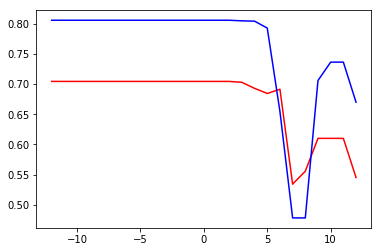

Max score in above regularization scale mu = 0:  0.7045  c value:  1e-12
Max score in above regularization scale mu = 4:  0.806  c value:  1e-12



Min score in above regularization scale mu = 0:  0.534  c value:  10000000.0
Min score in above regularization scale mu = 4:  0.478  c value:  10000000.0


In [7]:
#Plot results
plt.clf()
log_scale= np.log(np.array(scale))/np.log(10)
plt.plot(log_scale,scores1,'r-') #mu value 0 
plt.plot(log_scale,scores2,'b-') #mu value 4
plt.show()
print('Max score in above regularization scale mu = 0: ', np.max(scores1),' c value: ',scale[np.argmax(scores1)])
print('Max score in above regularization scale mu = 4: ', np.max(scores2),' c value: ',scale[np.argmax(scores2)])
print('\n\n')
print('Min score in above regularization scale mu = 0: ', np.min(scores1),' c value: ',scale[np.argmin(scores1)])
print('Min score in above regularization scale mu = 4: ', np.min(scores2),' c value: ',scale[np.argmin(scores2)])

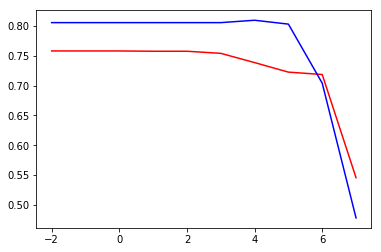

In [16]:
plt.plot(log_scale[10:20],scores1[10:20],'r-') #mu value 0 
plt.plot(log_scale[10:20],scores2[10:20],'b-') #mu value 4
plt.show()

In [14]:
#Regualrization scale.
scale = np.array([1e-12,1e-11,1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,1e1,1e2,1e3,1e4,1e5,1e6,1e7,1e8,1e9,1e10,1e11,1e12])

#Uses my own kernel classifier, with polynomial kernel.
kPoly = lambda X1,X2: kernelPoly(X1,X2,4)
clf=kC.KernelClassifier(kPoly)
scores1 = classify(X_vals1,y_vals1,clf,scale)
scores2 = classify(X_vals2,y_vals2,clf,scale) 

Training for c value:  1e-12
Training kernel logistic regression model...

COMPLETED. Running Time: 5.187 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 5.047 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 4.817 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 5.308 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 4.763 seconds 
Training for c value:  1e-11
Training kernel logistic regression model...

COMPLETED. Running Time: 4.994 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 4.971 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 4.766 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 5.189 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 4.764 seconds 
Training for c value:  1e-10
Training kernel logistic regression model...

COMPLET

COMPLETED. Running Time: 5.192 seconds 
Training for c value:  1000000.0
Training kernel logistic regression model...

COMPLETED. Running Time: 5.740 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 5.868 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 5.803 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 6.043 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 5.902 seconds 
Training for c value:  10000000.0
Training kernel logistic regression model...

COMPLETED. Running Time: 2.260 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 5.429 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 2.169 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 4.770 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 5.598 seconds 
Training for c value:  100000000.

COMPLETED. Running Time: 5.081 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 4.997 seconds 
Training for c value:  0.1
Training kernel logistic regression model...

COMPLETED. Running Time: 6.084 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 4.789 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 5.224 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 4.997 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 5.287 seconds 
Training for c value:  1.0
Training kernel logistic regression model...

COMPLETED. Running Time: 5.965 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 4.852 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 5.651 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 4.989 seconds 
Training kernel logistic regression model...



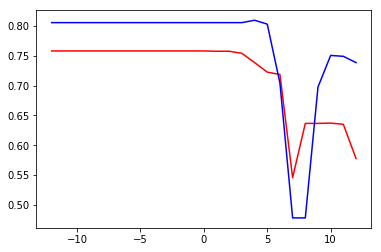

Max score in above regularization scale mu = 0:  0.758  c value:  1e-12
Max score in above regularization scale mu = 4:  0.8095  c value:  10000.0



Min score in above regularization scale mu = 0:  0.5455  c value:  10000000.0
Min score in above regularization scale mu = 4:  0.478  c value:  10000000.0


In [15]:
#Plot results
plt.clf()
log_scale= np.log(np.array(scale))/np.log(10)
plt.plot(log_scale,scores1,'r-') #mu value 0 
plt.plot(log_scale,scores2,'b-') #mu value 4
plt.show()
print('Max score in above regularization scale mu = 0: ', np.max(scores1),' c value: ',scale[np.argmax(scores1)])
print('Max score in above regularization scale mu = 4: ', np.max(scores2),' c value: ',scale[np.argmax(scores2)])
print('\n\n')
print('Min score in above regularization scale mu = 0: ', np.min(scores1),' c value: ',scale[np.argmin(scores1)])
print('Min score in above regularization scale mu = 4: ', np.min(scores2),' c value: ',scale[np.argmin(scores2)])

In [17]:
#Regualrization scale.
scale = np.linspace(1,1e5,10)

#Uses my own kernel classifier, with polynomial kernel.
kPoly = lambda X1,X2: kernelPoly(X1,X2,4)
clf=kC.KernelClassifier(kPoly)
scores1 = classify(X_vals1,y_vals1,clf,scale)
scores2 = classify(X_vals2,y_vals2,clf,scale) 

Training for c value:  1.0
Training kernel logistic regression model...

COMPLETED. Running Time: 5.072 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 5.049 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 4.806 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 5.233 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 4.912 seconds 
Training for c value:  11112.0
Training kernel logistic regression model...

COMPLETED. Running Time: 8.381 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 7.311 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 7.659 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 7.789 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 7.550 seconds 
Training for c value:  22223.0
Training kernel logistic regression model...

COMPL

Training kernel logistic regression model...

COMPLETED. Running Time: 6.684 seconds 
Training for c value:  88889.0
Training kernel logistic regression model...

COMPLETED. Running Time: 5.165 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 5.730 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 8.156 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 4.981 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 6.129 seconds 
Training for c value:  100000.0
Training kernel logistic regression model...

COMPLETED. Running Time: 5.057 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 5.432 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 6.640 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 5.211 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 6.363 

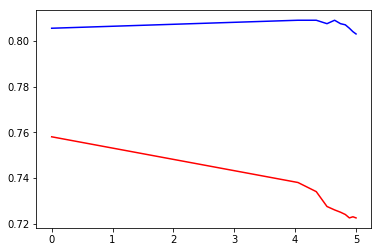

Max score in above regularization scale mu = 0:  0.758  c value:  1.0
Max score in above regularization scale mu = 4:  0.809  c value:  11112.0



Min score in above regularization scale mu = 0:  0.7225  c value:  100000.0
Min score in above regularization scale mu = 4:  0.803  c value:  100000.0


In [18]:
#Plot results
plt.clf()
log_scale= np.log(np.array(scale))/np.log(10)
plt.plot(log_scale,scores1,'r-') #mu value 0 
plt.plot(log_scale,scores2,'b-') #mu value 4
plt.show()
print('Max score in above regularization scale mu = 0: ', np.max(scores1),' c value: ',scale[np.argmax(scores1)])
print('Max score in above regularization scale mu = 4: ', np.max(scores2),' c value: ',scale[np.argmax(scores2)])
print('\n\n')
print('Min score in above regularization scale mu = 0: ', np.min(scores1),' c value: ',scale[np.argmin(scores1)])
print('Min score in above regularization scale mu = 4: ', np.min(scores2),' c value: ',scale[np.argmin(scores2)])

#### Variation of classification accuracy with quantity of data ####

In [12]:
kPoly = lambda X1,X2: kC.kernelPoly(X1,X2,2)
clf=kC.KernelClassifier(kPoly)
#Number of samples each class
N = [1000,1200,1500,1700,2000]
Accscores1 = []
Accscores2 = []
for n_samples in N:
    #Get  classification setup
    (X_vals1,y_vals1) = returnSetup(mu_value1, generator_marginal, generator_thetaGiven, n_samples)
    (X_vals2,y_vals2) = returnSetup(mu_value2, generator_marginal, generator_thetaGiven, n_samples)
    Accscores1.append(classify(X_vals1,y_vals1,clf,[100])) #For fixed regularization value
    Accscores2.append(classify(X_vals2,y_vals2,clf,[10]))  #For fixed regularization value

Training for c value:  100
Training kernel logistic regression model...

COMPLETED. Running Time: 5.245 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 4.904 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 5.009 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 4.669 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 5.055 seconds 
Training for c value:  10
Training kernel logistic regression model...

COMPLETED. Running Time: 5.928 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 6.207 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 6.181 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 6.072 seconds 
Training kernel logistic regression model...

COMPLETED. Running Time: 6.492 seconds 
Training for c value:  100
Training kernel logistic regression model...

COMPLETED. Run

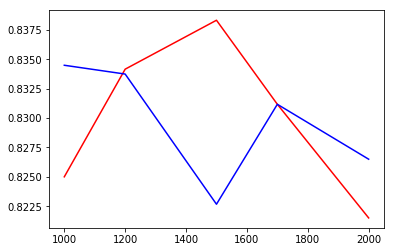

In [13]:
#Plot results
plt.clf()
plt.plot(N,Accscores1,'r-') #mu value 0 
plt.plot(N,Accscores2,'b-') #mu value 4
plt.show()

Soft conclusion: Using 400 more training points will improve classification accuracy without increasing overfitting and needing hasrsher regularization.